# Numerical integration of ODEs

NOTE: there is a bug in displaying Juptyer notebooks on github with some browsers. This can result in missing mathematical expressions. So, for best results, read this document on a computer running Juptyer notebook software.

## Simple harmonic motion

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/spring.png)
Consider a horizontal spring attached to a mass sliding on a frictionless table. The spring is extended and let go. The motion will be simple harmonic, and given by solving Newton's Second Law of motion:

$$ma=-kx$$

or, rewriting in a standard form for an ODE (ordinary differential equation):

$$\ddot{x}+{k\over m}x=0$$

or even better as

$$\ddot{x}+\omega^2x=0$$

where $\omega=\sqrt{k/m}$. This is better in the sense that it makes it explicit that the coefficient of $x$ is positive, and, as we shall see shortly, $\omega$ is the angular frequency of the motion.

ASIDE: *ordinary* DE's are ones that involve a single independent variable (in our case time, $t$), as opposed to *partial* DE's that contain more than one independent variable. Furthermore, since this ODE only includes $x$ and its derivatives to the first power or the zeroth power, it is *linear*, meaning that any linear combination of solutions is also a solution. It is a *second order* ODE since it involves 2nd derivatives of $x$. Finally, it is *homogenous*, meaning that the RHS is zero (there is no forcing function).

The general solution to the above equation is:

$$x=c_0\cos({\omega t})+c_1\sin({\omega t})$$

where $c_0$ and $c_1$ are constants that are constrained by the initial conditions ($x$ and $\dot{x}$ at $t=0$) of the experiment.

For example, suppose we have a mass of 1.23 kg, a spring with constant 3.00 N/m, an initial extension of 0.1 m, and an initial velocity of zero. In this case $c_0$ is 0.1 and $c_1$ is zero.

The following snippet will plot the first 60 seconds of motion.



<IPython.core.display.Javascript object>


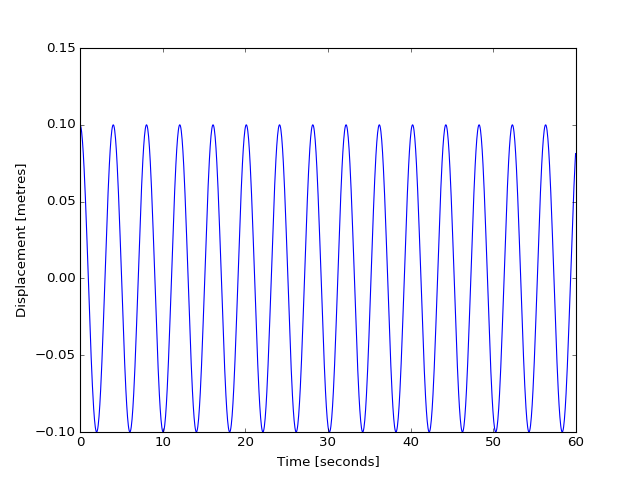

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# The spring constant and mass.

k = 3.00
m = 1.23

# Derived values.

w = (k/m)**0.5

# An array of times at which we want to evaluate the system.

t = np.array(np.arange(0, 60.0, 0.05))

# Solve the ODE for the position of the mass.

x = 0.1 * np.cos(w*t)

# Plot the position as a function of time.

plt.plot(t, x)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

The above graph was done with "notebook" style rather than "inline". This allows you to interact with the graph (trying panning, zooming, and the other buttons; finish by pressing the power icon to stop interaction). If the graph didn't appear, you might have to restart the Jupyter kernel (click on Kernel, then Restart).

Eyeballing the graph shows that the period is about $T=56/14=4.0$ s, which gives an angular frequency of $\omega=2\pi/T=1.57$, which agrees nicely with $\sqrt{k/m}=1.56$. No surprises there. 

Note how easy it is with numpy to operate on vectors (the array of times). Many computer languages require you to operate on each element of the vector in turn, requiring a looping structure - numpy does his behind the scenes. This has several advantages, e.g., the programs are smaller, less chance for mistakes, and the internal work that numpy does can be highly optimised for speed (perhaps written in a lower-level language such as C or FORTRAN).

## Solving the simple harmonic motion by brute force

Now let's suppose that we didn't have the mathematical chops to solve this ODE analytically. Instead, we are going to brute force it using a computer. We will start with the naivest possible technique, which is to numerically integrate the equation of motion from one time step to the next by assuming the velocity remains constant over the time step. In mathematical form, we are starting from some initial position $x_i$ and velocity $\dot{x}_i$ at the beginning of time $i$, and performing the following calculations for each timestep $\Delta T$ into the future:

$$\begin{align}
\ddot{x}_i&=-{k\over m}x_i\\
x_{i+1}&=x_i+\dot{x}_i\Delta t\\
\dot{x}_{i+1}&=\dot{x}_i+\ddot{x}_i\Delta t
\end{align}$$

And here is the Python code to do this:

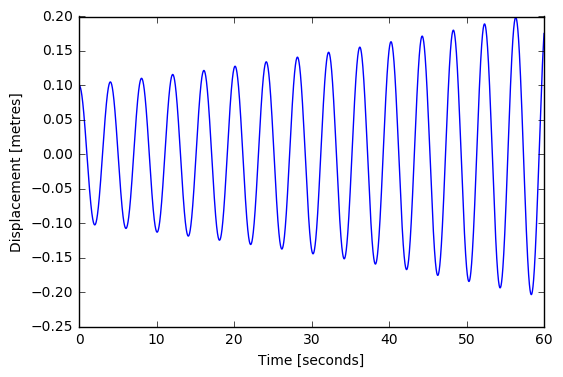

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the spring constant and mass.

k = 3.00
m = 1.23

# Choose the time step, and generate the array of time values.

dt = 0.01
t = np.array(np.arange(0, 60.0, dt))

# Set the initial position and velocity, and 
# initialise the array of positions.

x = 0.1
x_dot = 0.0
x_arr = []

# Now step from one time to the next, updating the position, 
# velocity, and acceleration.

for time in t:

    # Add the current position to the array of positions.
    
    x_arr.append(x)
    
    # Calculate the acceleration from the ODE.
    
    x_double_dot = -(k / m) * x
    
    # Update the position and velocity to the end of this time step.
    
    x += x_dot * dt
    x_dot += x_double_dot * dt

# Finally, plot the results.
    
plt.plot(t, x_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()


Hm... while the initial cycle looks OK, and the period is right, the amplitude is increasing with time, which is clearly non-physical. This is a common problem with the Euler method (the one we have used). The figure below shows how the Euler method diverges from the curved blue path (which is the correct solution).

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/euler.png)
To get a feeling for the extent of the problem, we can calculate the total energy at each point, and see how that varies with time (it should remain constant for this example).

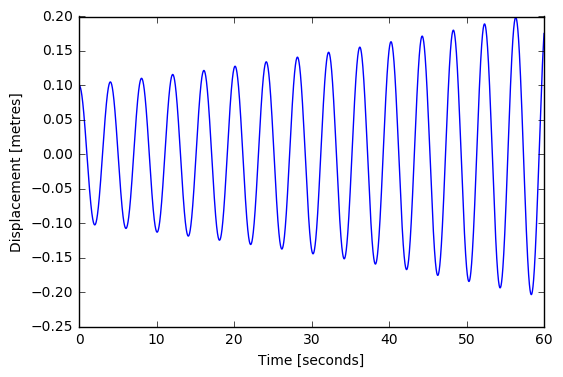

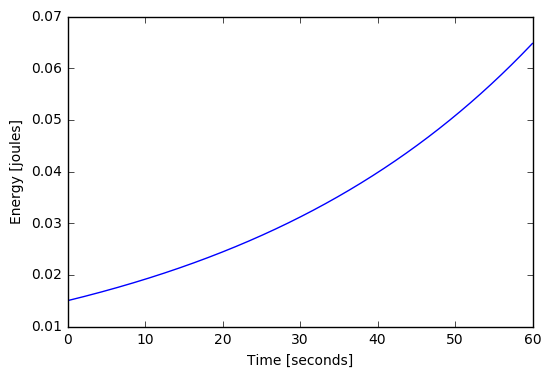

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the spring constant and mass.

k = 3.00
m = 1.23

# Choose the time step, and generate the array of time values.

dt = 0.01
t = np.array(np.arange(0, 60.0, dt))

# Set the initial position and velocity, and 
# initialise the array of positions.

x = 0.1
x_dot = 0.0
x_arr = []
e_arr = []

# Now step from one time to the next, updating the position, 
# velocity, and acceleration.

for time in t:

    # Add the current position to the array of positions.
    
    x_arr.append(x)
    
    # Calculate the total energy. This should remain constant.
    
    e_arr.append(0.5 * m * x_dot**2 + 0.5 * k * x**2)
        
    # Calculate the acceleration from the ODE.
    
    x_double_dot = -(k / m) * x
    
    # Update the position and velocity
    
    x += x_dot * dt
    x_dot += x_double_dot * dt

# Plot the results.

plt.plot(t, x_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

plt.plot(t, e_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Energy [joules]")
plt.show()


With a time step of 0.01 seconds we are seeing that the total energy of the system increases by a factor of four in 60 seconds. This is clearly not a good result.

To improve the situation we can reduce the time step (try it!). However, a better approach is to use a more sophisticated numerical integration technique. A commonly used method is 4th order Runge-Kutta, which requires calculating the force at four points along each time interval. Its big advantage over the Euler method is that its accumulated error reduces as the step size to the 4th power, whereas the Euler method is first order. So you gain a great deal more by halving the step size with Runge-Kutta.

It turns out, however, that there is a simple improvement on the Euler method, called the leapfrog method, that works particularly well for dynamical systems (such as springs, and gravity) defined by 2nd order ODEs:

$$\begin{align}
x_{i+1}&=x_i+\dot{x}_{i+{1\over 2}}\Delta t\\
\ddot{x}_{i+1}&=-{k\over m}x_{i+1}\\
\dot{x}_{i+{3\over 2}}&=\dot{x}_{i+{1\over 2}}+\ddot{x}_{i+1}\Delta t
\end{align}$$

Essentially we are simply evaluating the velocity at the midpoint of the interval. The number of times we evaluate the ODE for each time step is the same as for the Euler method.

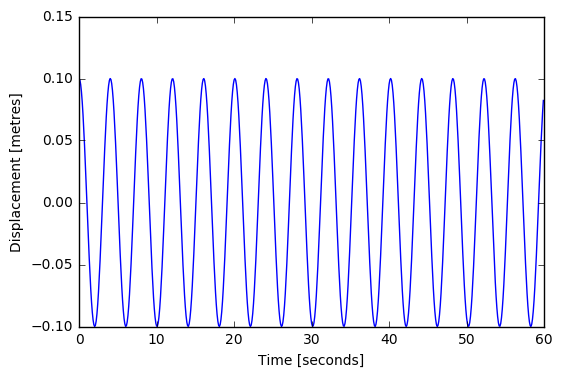

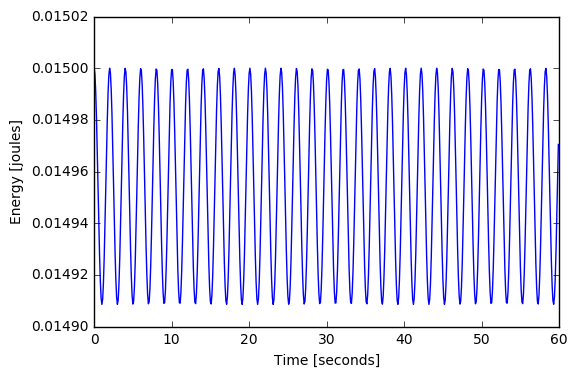

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the spring constant and mass.

k = 3.00
m = 1.23

# Choose the time step, and generate the array of time values.

dt = 0.1
t = np.array(np.arange(0, 60.0, dt))

# Set the initial position and velocity.

x = 0.1
x_dot = 0.0

# Update the velocity to the mid-point of the first time step.

x_double_dot = -(k / m) * x
x_dot += 0.5 * x_double_dot * dt

# Initialise our result arrays.

x_arr = []
e_arr = []

# Now step from one time to the next, updating the position, 
# velocity, and acceleration.

for time in t:

    # Add the current position to the array of positions.
    
    x_arr.append(x)
    
    # Calculate the total energy. This should remain constant.
    # Note that we backtrack the velocity to the beginning of the time step.
    
    e_arr.append(0.5 * m * (x_dot - 0.5 * x_double_dot * dt)**2 + 0.5 * k * x**2)
        
    # Update the position and velocity using the leapfrog algorithm.
    
    x += x_dot * dt
    x_double_dot = -(k / m) * x
    x_dot += x_double_dot * dt

# Plot the results.

plt.plot(t, x_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

plt.plot(t, e_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Energy [joules]")
plt.show()


This is a dramatic improvement over the Euler technique (look carefully at the energy axis to see how constant it is). And that was with a time step of 0.1 seconds (10 times larger than we used initially).

## Heavy-duty numerical integration using scipy.integrate

Having explored writing our own numerical integration techniques, let's now try a canned routine written by the experts. We are going to use scipy.integrate.odeint, which is essentially a Python wrapper around some very efficiently written FORTRAN code written by experts in the art, decades ago. This makes it faster than pure Python.

### Expressing our ODE in *state-variable* (also known as *normal*) form

Computer routines for solving ODEs usually require you to supply the description of the system in so-called *state-variable* form. Mathematicians call this *normal form*.

A *state variable* is a variable required to specify the state of the system. Typical examples for mechanical systems include the position and velocity of the independent components of a system. For thermodynamical systems, state variables may include temperature, pressure, volume, entropy, etc. For electrical systems, state variables are usually voltage and current. 

Once you have identified the state variables, you need to write down 1st order ODEs giving the time derivative of each state variable. If your system is described by a 2nd order ODE, you can rewrite this as two coupled 1st order ODEs. This sounds complicated, but it is actually straightforward in most cases. For our simple harmonic oscillator, the ODEs are:

$$\begin{align}\dot{x}&=v\\
\dot{v}&=-\omega^2 x
\end{align}$$

where I have written $v$ rather than $\dot{x}$ to clarify that we really do have two coupled 1st order ODEs. The ODEs are *coupled* in the sense that you have to solve them simultaneously. 

The next step in using odeint it to write a Python function that takes a list containing the position and velocity, and returns a list containing their derivatives.

Here is the function:

In [5]:
# Takes position and velocity stored in the list "y", and
# returns a list containing the time derivatives, i.e., 
# velocity and acceleration.
#
# "t" (the time) is not used in this function (it could be used
# to include a forcing function).
# "w" contains the angular frequency, which is a constant supplied
# by the user.

def f(y, t, w):
    x, v = y
    return [v, -(w**2) * x]

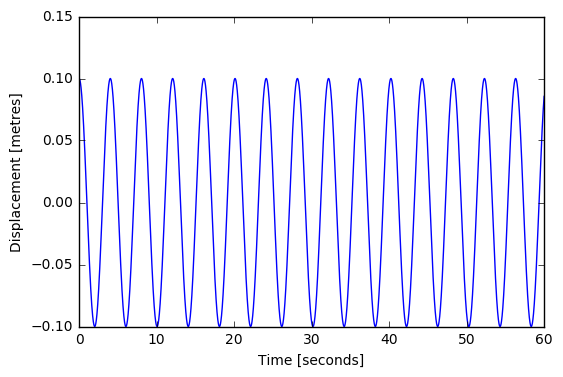

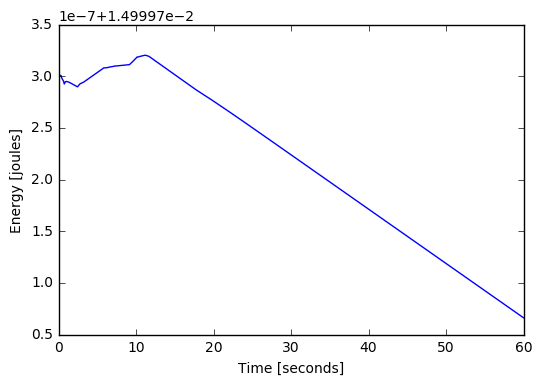

In [6]:
import numpy as np
from scipy.integrate import odeint

# Create an array of time values.

t = np.linspace(0, 60.0, 60.0 / 0.01)

# The parameters of the spring system.

k = 3.00
m = 1.23
w = (k / m)**0.5

# Solve it! Note that the additional "args" supplied to "odeint"
# must be in a tuple; "(w,)" creates a single-element tuple.

solution = odeint(f, [0.1, 0.0], t, args=(w,))

# "solution" is a 2D array, the first column contains the positions
# and the second column the velocities.

plt.plot(t, solution[:,0])
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

# Calculate the energy and plot it.

e = 0.5 * m * solution[:,1]**2 + 0.5 * k * solution[:,0]**2 
plt.plot(t, e)
plt.xlabel("Time [seconds]")
plt.ylabel("Energy [joules]")
plt.show()


Look closely at the axis labels for the energy - it is actually very close to being constant.

As you can see, scipy.integrate.odeint is actually very easy to use, so there really is no need to roll your own function for numerical integration.

## Damped harmonic oscillators

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/damped-spring.gif)
If we take a simple harmonic oscillator and add a damping term (i.e., a retarding force proportional to the velocity), we have the following 2nd order ODE:

$$\ddot{x}+2\zeta\omega_0\dot{x}+\omega_0^2x=0$$

Where $\omega_0$ is the undamped angular frequency, and $\zeta$ is called the damping ratio. There are three damping regimes:

* $\zeta>1$, *overdamped*, the system exponentially decays to equilibrium without oscillation,
* $\zeta=1$, *critically damped*, the system reaches equilibrium as quickly as possible, overshooting once, and
* $\zeta<1$, *underdamped*, the system oscillates with steadily decreasing amplitude, eventually reaching equilibrium.

For systems such as car shock-absorbers, you want critical damping. This is also important in temperature control applications, and many others.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/shock.jpg)
![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/rlc.png)


The damped harmonic oscillator equation has widespread applicability across many areas of physics, including electronics (R, L, C oscillation) and even quantum mechanics. 

While the damped harmonic oscillator can be solved analytically, we will explore numerical solutions as before.

We being by rewriting the damped harmonic oscillator equation as two coupled 1st order ODEs as follows:

$$\begin{align}\dot{x}&=v\\
\dot{v}&=-2\zeta\omega_0v-\omega_0^2x
\end{align}$$

So the function we supply to `scipy.integrate.odeint` looks like this:

In [38]:
def f(y, t, zeta, w0):
    x, v = y
    return [v, -2.0 * zeta * w0 * v - (w0**2) * x]

Now follow the motion for 60 seconds using `scipy.integrate.odeint`. You should explore the effect of changing the damping ratio from 0, through 1, and up to higher numbers.

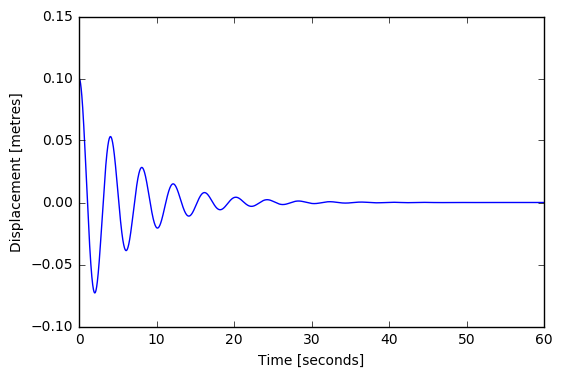

In [39]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Create an array of time values.

t = np.linspace(0, 60.0, 60.0 / 0.01)

# The parameters.

zeta = 0.1

# We are using the same angular frequency as for the 
# previous simple harmonic case.

w0 = (3.00/1.23)**0.5

# Solve it! Note that the initial conditions are x = 0.1, v = 0.0.

solution = odeint(f, [0.1, 0.0], t, args=(zeta, w0))

# "solution" is a 2D array, the first column contains the positions
# and the second column the velocities.

plt.plot(t, solution[:,0])
plt.ylabel("Displacement [metres]")

# Uncomment these lines to plot energy.

# plt.plot(t, solution[:,1])
# plt.ylabel("Total energy [Joules]")

# plt.ylim(-0.00001,0.00001)
plt.xlabel("Time [seconds]")
plt.show()


Note that the mechanical energy doesn't remain constant, since energy is being dissipated as heat in the damper.

## Adding a forcing function to a damped harmonic oscillator

We can easily redefine our function "f" to include a forcing function (which is where the time argument comes in handy). This allows us to investigate the *steady state* response of the system (as opposed to the *transient* response that comes from the solution to the homogenous ODE), and to investigate effects such as resonance.

Try experimenting yourself by redefining "f" as follows, and then execute the previous program again. Note the ```0.1 * math.cos(3 * w0 * t)``` forcing function.

In [36]:
import math
def f(y, t, zeta, w0):
    x, v = y
    return [v, -2.0 * zeta * w0 * v - (w0**2) * x + 0.1 * math.cos(3 * w0 * t)]

# Linear differential equations

The examples above have been of *linear* ODEs, i.e., the terms in the equations involve only the zeroth or first power of the independent variables and their derivatives. Linear ODEs are very important in physics, and have mathematical properties that make their solution relatively easy. As we have already seen, any linear combination of solutions is a solution. Also, if you know the *transient response* of the system, i.e., the response to an impulse (or simply relaxing from initial conditions), you can use this to determine the response to an arbitrary forcing function (which can be considered to be a series of impulses). This also needs naturally to fourier analysis, where an arbitrary forcing function can be decomposed into sine wave components, so the final response of the system can be found by simply adding the responses to the constituent sine waves.

These ideas are lucidly explained by Richard Feynman in his *Lectures on Physics*, Volume 1, Chapter 25, [Linear Systems and Review](http://www.feynmanlectures.caltech.edu/I_25.html). This is well worth reading.

# Non-linear differential equations

In practice, most real physical problems are non-linear to some extent, which makes them difficult to solve analytically. One approach is to use a linear approximation to the problem, which works particularly well if the state of the system never strays far from equilibrium. Alternatively, computer routines such as `scipy.integrate.odeint` can be used to numerically solve non-linear equations.


# Course survey 2018 

Please complete this in-class on Thursday 15 March 2018.

# https://goo.gl/forms/k04EPiGI6QW8nkyp2

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/qrcode.39307599.png)

Another use for QR codes (sending text, in this case a program fragment):

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/qrcode.39307648.png)


## The simple pendulum, at large angles

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/pendulum.png)
The simple pendulum is governed by the following 2nd order non-linear homogenous ODE.

$$\ddot{\theta}+{g\over l}\sin{\theta}=0$$

To solve this we normally use the small angle approximation, replacing $\sin{\theta}$ with $\theta$. Here we will solve the full equation numerically. We define a new variable $\Omega$, which is just the time derivative of $\theta$, so that we can write two coupled 1st order ODEs: 

$$\begin{align}\dot{\theta}&=\Omega\\
\dot{\Omega}&=-{g\over l}\sin{\theta}
\end{align}$$

We now write our function "f" and solve using `scipy.integrate.odeint`.


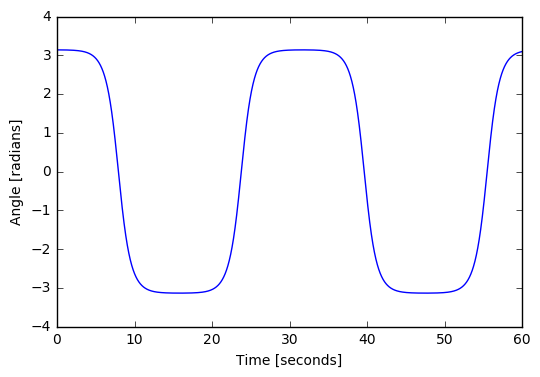

In [15]:
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Here is the function that defines our set of coupled ODEs.
# "y" is a numpy array containing theta and theta_dot.
# The function returns a numpy array containing
# theta_dot and theta_double_dot. "t" is the list of times,
# which we don't use in this case. "gravity" and "l" are constants.

def f(y, t, gravity, l):
    theta, theta_dot = y
    return [theta_dot, - (gravity / l) * math.sin(theta)]

# Create an array of time values.

t = np.linspace(0, 60.0, 60.0 / 0.01)

# The parameters.

gravity = 9.8
l = 10.0

# Solve it! The 2nd argument to "odeint" gives the initial conditions.

solution = odeint(f, [math.pi * 0.999, 0.0], t, args=(gravity, l))

plt.plot(t, solution[:,0])
plt.xlabel("Time [seconds]")
plt.ylabel("Angle [radians]")
plt.show()


You should experiment with the initial conditions of the pendulum, and see how the motion becomes clearly non-sinsoidal when the amplitude is large.

You might be interested in a recent (January 2017) [paper](http://iopscience.iop.org/article/10.1088/1361-6404/aa543f) published on a *fast* converging power series for the period of the simple pendulum. The following equation is a *slowly* converging power series for the exact solution. $u$ and $k$ are functions of the amplitude and angle of the pendulum.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/power-series.gif)

Question: how would you modify the above program to calculate the *period* of the pendulum?

## The three-body gravitational problem

The two-body problem is relatively easy to solve analytically: the orbits are stable conic sections with focii at the barycentre (centre of mass) of the system.

In contrast, the three-body problem can *not* be solved analytically (this was first proven in 1887 by Heinrich Bruns and Henri Poincare), apart from a few special cases that probably aren't interesting physically.

So we have to use numerical techniques. The three DEs are, for $i=1\ldots3$:

$$\ddot{r}_i=-G\sum_{j=1;j\ne i}^{j=3}{{m_j\hat{r}_{ij}}\over r_{ij}^2}$$

where $\ddot{r}_i$ is the 3D acceleration of particle $i$, $\hat{r}_{ij}$ is the unit vector from particle $i$ to particle $j$, and $r_{ij}$ is the distance between particles $i$ and $j$.

With three 2nd order ODEs, in three dimensions, this gives us eighteen 1st order scalar ODEs (9 positions, 9 velocities). This sounds difficult, but the function "f" to pass to `odeint` isn't *too* hard to write, as we see below.

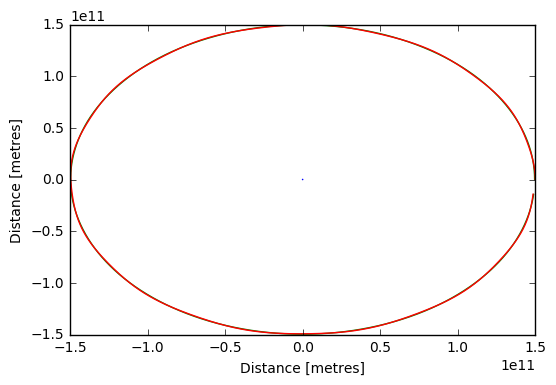

In [25]:
import math
import numpy as np
import scipy.constants
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

G  = scipy.constants.G # big G, the gravitational constant

solar_system = True

if solar_system:

    m1 = 1.989E30 # mass of the sun
    m2 = 5.976E24 # mass of the earth
    m3 = 7.342E22 # mass of the moon

else:
    
    m1 = 4.0E30
    m2 = 5.0E30
    m3 = 3.0E30

# The numpy 1D array "y" contains the 3D positions of the 
# sun, earth, and moon, followed by their 3D velocities.
# That is 18 numbers in all. The "t" array of times is not used.
#
# "f" returns the time derivatives of these quantities.

def f(y, t):
    
    # Extract the positions from "y".
    
    x1, y1, z1, x2, y2, z2, x3, y3, z3 = y[:9]
    
    # We calculate the cube of the distances between the objects,
    # since we need to divide by distance squared, and then an
    # additional factor of the distance to allow for the unit
    # vector calculation of the force direction. Think about it!
    
    r12 = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**1.5
    r13 = ((x1-x3)**2 + (y1-y3)**2 + (z1-z3)**2)**1.5
    r23 = ((x3-x2)**2 + (y3-y2)**2 + (z3-z2)**2)**1.5
    
    # Calculate the 3D components of the accelerations.
    
    ax1 = - G * (m2*(x1-x2)/r12 + m3*(x1-x3)/r13)
    ay1 = - G * (m2*(y1-y2)/r12 + m3*(y1-y3)/r13)
    az1 = - G * (m2*(z1-z2)/r12 + m3*(z1-z3)/r13)

    ax2 = - G * (m1*(x2-x1)/r12 + m3*(x2-x3)/r23)
    ay2 = - G * (m1*(y2-y1)/r12 + m3*(y2-y3)/r23)
    az2 = - G * (m1*(z2-z1)/r12 + m3*(z2-z3)/r23)

    ax3 = - G * (m2*(x3-x2)/r23 + m1*(x3-x1)/r13)
    ay3 = - G * (m2*(y3-y2)/r23 + m1*(y3-y1)/r13)
    az3 = - G * (m2*(z3-z2)/r23 + m1*(z3-z1)/r13)
    v = y[9:]
    return v.tolist() + [ax1, ay1, az1, ax2, ay2, az2, ax3, ay3, az3]

# Create an array of time values. The order of the arguments to np.linspace is
#  - initial time
#  - final time
#  - number of steps

if solar_system:
    t = np.linspace(0, 3600*24*360, 3000)
else:
    t = np.linspace(0, 3600*2, 3000)

# Solve it! The 2nd argument to "odeint" gives the initial conditions,
# which have been carefully chosen to make the sun/earth/moon system
# agree fairly closely with our solar system. It would have been better
# to have placed the barycentre of the solar system at (0,0,0) rather
# than the sun. We start with the sun, earth, and moon on the x-axis.

if solar_system:
    solution = odeint(f, 
                          [0,0,0,                  # position of the sun
                          149.6e9,0,0,             # position of the earth
                          149.6e9 + 3.84399e8,0,0, # position of the moon
                          0,0,0,                   # velocity of the sun
                          0,29.786e3,0,            # velocity of the earth
                          0,29.786e3 + 1022,0      # velocity of the moon
                          ], t)
else:
    solution = odeint(f, 
                          [0,0,0,                  # position of the 1st star
                          30.0e8,0,0,              # position of the 2nd star
                          30.0e8, 40.0e8,0,        # position of the 3rd star
                          0,0,0,                   # velocity of the 1st star
                          0,0,0,                   # velocity of the 2nd star
                          0,0,0                    # velocity of the 3rd star
                          ], t)

# And plot the solution.

plt.plot(solution[:,0], solution[:,1]) # plot the (x,y) position of the sun or 1st star
plt.plot(solution[:,3], solution[:,4]) # plot the (x,y) position of the earth or 2nd star
plt.plot(solution[:,6], solution[:,7]) # plot the (x,y) position of the moon or 3rd star
#plt.plot(solution[:,6]-solution[:,3], solution[:,7]-solution[:,4]) # plot moon relative to earth
plt.xlabel("Distance [metres]")
plt.ylabel("Distance [metres]")
plt.show()


I selected the initial conditions carefully in the above program to closely replicate the sun, earth, moon system. I deliberately plotted only 360 days of motion rather than a full year so that you can see that the earth is close to completing an orbit.

You can now experiment with various observation periods, and various initial conditions. 

You can uncomment some lines in the code to plot the position of the moon relative to the earth, and verify that the moon's orbital period is about 29 days.

You might like to try the so-called Pythagorean three-body problem, which is where you have three bodies with masses in the ratio 3:4:5, initially at rest at the vertices of a 3:4:5 triangle. In 1967 this was proved by Victor Szebehely to result in the escape of one of the bodies. If you simulate this system you will see some very interesting motions. Simply change solar_system in the above program to False, and experiment with the masses and the time interval.

## Some more comments on n-body gravitation

- For solving ODEs for more than a handful of objects, using `odeint` is not the best solution. There are more efficient ways of solving the gravitational problem, even involving special-purpose hardware such as the GRAPE computers. Recently, GPUs (graphical processing units, developed primarily for video games) have taken over as the computing engine of choice for state-of-the-art computation, since they are spectacularly powerful and relatively cheap.

- You are also likely to need to vary the timestep as the calculation progresses, so that you capture behaviour accurately when interactions are happening rapidly (on timescales of days for close binary stars), up to billions of years.

- The solar system is unstable (in the sense that there could be major changes to the orbits, and possibly even the ejection of a planet) on timescales of 100s of millions (?) of years.

- Even the smallest delta in positions/velocities can lead to chaotic behaviour.

- Coping with large numbers (> 10,000) of particles is not for the faint-hearted. You need more particles than this for globular clusters, which can contain up to around a million stars. This has only been possible in the last decade.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/glob.jpg)

- The computation time for the naive algorithm we have been using goes as $O(N^2)$. More sophisticated algorithms use "tree" structures, where distant particles can be grouped together to reduce the computational complexity.

- For a remarkable set of notes on "the art of computatational science" and the gravitational n-body problem, see [here](http://www.artcompsci.org/kali/development.html).

- For a review of the state-of-the-art (in 2011) see [here](https://arxiv.org/abs/1105.1082). The following figure was taken from this paper: 

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/gravhist.png)

- There is a general pattern here that is true for many areas of physics: in order to be at the forefront of research you need to have a combination of clever algorithms, access to powerful computers, and insight into what are the interesting areas of research.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/Galaxy_cluster_sim.png)
